## 第4章 財務データの取得と可視化

### 4.2 Rを利用した財務データ分析入門

#### 4.2.1 tidyverseパッケージの概要

In [1]:
# ch04_01: ライブラリの読み込み

# 本章で利用する以下の三つのライブラリ・モジュールを読み込む
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# pandasのバージョンによっては，将来の仕様変更に関する警告が発せられるため，それを非表示に
import warnings
warnings.filterwarnings("ignore")

#### 4.2.2 財務データの読み込み

In [2]:
# ch04_02: CSVファイルの読み込み

financial_data = pd.read_csv('ch04_financial_data.csv')

# 行数の確認
len(financial_data)

# shape属性を使っても行数確認可能
# shapeは(行数, 列数)のタプルを返すため，shape[0]で行数をshape[1]で列数を取得できる
financial_data.shape[0] 

## 7920

financial_data.head()  # 冒頭N行を確認するにはfinancial_data.head(N)とする

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA,OL,FO
0,2015,1,1,5261.40,437.49,NaN,286.64,13005.55,3543.43,4372.96,2480.72
1,2016,1,1,5948.96,564.14,50.667498,513.48,13865.58,4642.16,4534.22,3959.70
2,2017,1,1,6505.06,691.18,29.543157,661.64,13952.58,7743.99,5111.22,6159.02
3,2018,1,1,6846.38,751.29,86.486500,664.80,18818.48,7284.72,5137.28,10123.91
4,2019,1,1,7572.24,958.53,298.049774,660.48,18190.00,9735.13,5487.96,11362.22


In [3]:
# ch04_03: firm_ID列とindustry_ID列をカテゴリ型に変換

financial_data['firm_ID'] = financial_data['firm_ID'].astype('category') 
financial_data['industry_ID'] = financial_data['industry_ID'].astype('category')

print(financial_data['firm_ID'].dtype)

## category

print(financial_data['industry_ID'].dtype)

## category

category
category


**コードch04_04は，R言語特有のものであるため割愛**

### 4.3 探索的データ分析

#### 4.3.1 データセットの概要確認

In [4]:
# ch04_05: 要約統計量の表示

# 要約統計量を表示するにはdescribe()メソッドを用い，include引数をallとすれば数値型以外の要約統計量も全て表示できる
financial_data.describe(include='all')  

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA,OL,FO
count,7920.000000,7920.0,7920.0,7.920000e+03,7920.000000,7919.000000,7920.000000,7.920000e+03,7.920000e+03,7.920000e+03,7.920000e+03
unique,NaN,1515.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6.0,1760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2017.542803,NaN,NaN,1.660070e+05,7968.907795,64.020924,7904.875920,1.522728e+05,8.018535e+04,5.026088e+04,7.068061e+04
std,1.705620,NaN,NaN,3.819803e+05,25951.564775,5941.342438,26910.184133,4.538792e+05,4.228521e+05,1.486024e+05,2.906257e+05
min,2015.000000,NaN,NaN,2.053400e+02,-353606.720000,-285383.869863,-357624.830000,2.165100e+02,2.884300e+02,3.504000e+01,4.364000e+01
25%,2016.000000,NaN,NaN,1.610333e+04,399.277500,-66.428412,383.270000,1.255991e+04,6.835073e+03,3.964835e+03,3.757440e+03
50%,2018.000000,NaN,NaN,4.043074e+04,1602.880000,-1.186762,1586.095000,3.079924e+04,1.909533e+04,1.086831e+04,1.112520e+04
75%,2019.000000,NaN,NaN,1.183138e+05,5260.460000,41.359527,5204.602500,9.346920e+04,5.211792e+04,3.311089e+04,3.544604e+04


In [5]:
# ch04_06: year列の固有要素を抽出

# pandasのunique()メソッドで固有要素の抽出
financial_data['year'].unique()  

## [2015 2016 2017 2018 2019 2020]

array([2015, 2016, 2017, 2018, 2019, 2020])

In [6]:
# ch04_07: firm_ID，及びindustry_ID列の固有要素数をカウント

# len()関数を適用して固有要素数をカウント
len(financial_data['firm_ID'].unique())  

# nunique()メソッドを使っても同様
financial_data['firm_ID'].nunique()  

## 1515

len(financial_data['industry_ID'].unique())

## 10

10

#### 4.3.2 欠損データの処理

In [7]:
# ch04_08: 各行の欠損の有無を判定

# notnull()とall(axis=1)を組み合わせてそれぞれの行の全要素が揃っているかを判定
financial_data.notnull().all(axis=1).head(6)  

## 0    False
## 1     True
## 2     True
## 3     True
## 4     True
## 5     True
## dtype: bool

0    False
1     True
2     True
3     True
4     True
5     True
dtype: bool

In [8]:
# ch04_09: 欠損のない行の総数をカウント

financial_data.notnull().all(axis=1).sum() 

7919

In [9]:
# ch04_10: 欠損行を削除

# 欠損行を削除した上でデータを上書き
financial_data = financial_data.dropna()  # 単にfinancial_data.dropna(inplace=True)でも可．

len(financial_data)

## 7919

7919

### 4.4 データの抽出とヒストグラムによる可視化

#### 4.4.1 条件に合うデータの抽出方法

In [10]:
# ch04_11: 2015年度のデータのみ抽出

# copy()メソッドを利用し，元データと独立した新たなデータフレームを作成
financial_data_2015 = financial_data[financial_data['year'] == 2015].copy()  

# locを使っても同様の結果を得ることが可能
financial_data_2015 = financial_data.loc[financial_data['year'] == 2015].copy()  

**コードch04_12からコードch04_14は，R言語上での代替的な方法を説明しているため割愛**

#### 4.4.2 ヒストグラムによる売上高の可視化

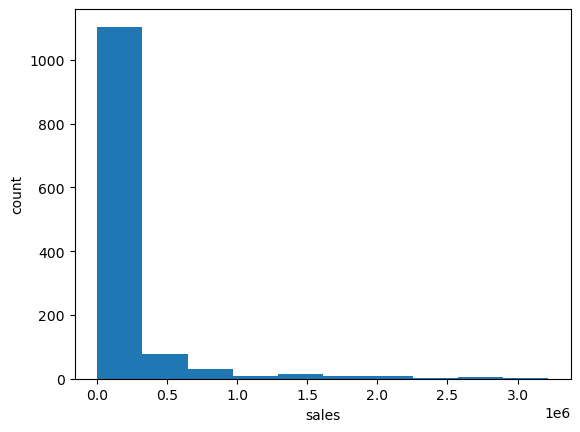

In [11]:
# ch04_15: 2015年度の売上高をヒストグラムに図示

plt.hist(financial_data_2015['sales'])
plt.xlabel('sales')
plt.ylabel('count')
plt.show()

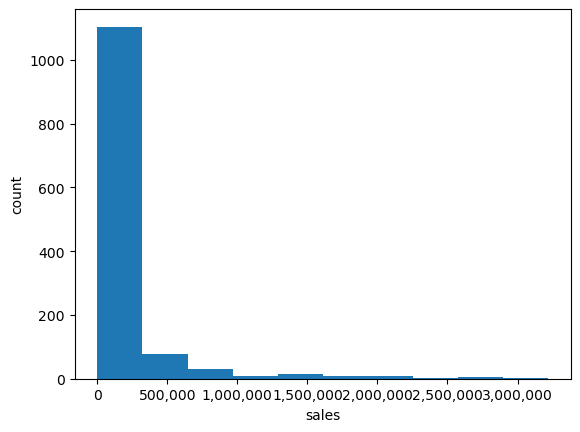

In [12]:
# ch04_16: 桁区切りのカンマをx軸の目盛りで表示

# グラフの軸を微調整するためにmatplotlibのtickerモジュールをインポート
import matplotlib.ticker as mticker  

plt.hist(financial_data_2015['sales'])
plt.xlabel('sales')
plt.ylabel('count')
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # x軸ラベルのフォーマットを桁区切りのカンマに変更 
plt.show()

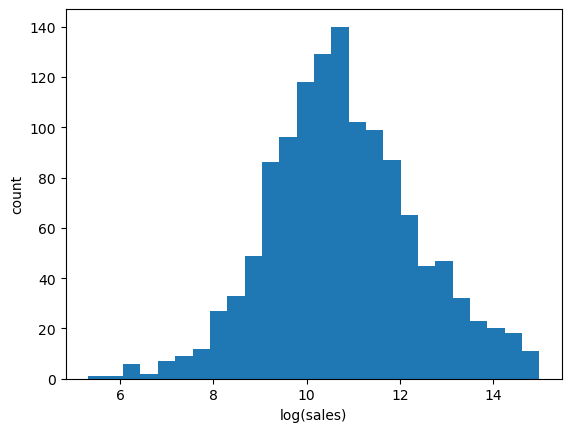

In [13]:
# ch04_17: 売上高の自然対数を取ってヒストグラムで可視化

plt.hist(np.log(financial_data_2015['sales']), bins='auto')  # 売上高の対数を自動でビン数を設定してヒストグラムで描画
plt.xlabel('log(sales)')
plt.ylabel('count')
plt.show()

In [14]:
# ch04_18: Pythonでの対数売上高の中央値の計算例

np.log(financial_data['sales']).median()

## 10.607396368416119

10.607396368416119

### 4.5 データの集計と折れ線グラフによる可視化

#### 4.5.1 for文を用いた集計

In [15]:
# ch04_19: 各年度の上場企業数のカウント (1) - NumPyベース

year_set = np.sort(financial_data['year'].unique())  # year列の固有要素を抽出して昇順に並び替え
N_firms_by_year = np.full_like(year_set, np.nan, dtype=int)  # 結果を保存するため整数型の配列を準備

for i in range(len(year_set)):
    year_i = year_set[i]  # i番目の年度を抽出
    N_firms_by_year[i] = np.sum(financial_data['year'] == year_i)  # i番目の年度のデータをカウント
print(N_firms_by_year)  # 結果の表示

[1265 1293 1319 1323 1356 1363]


In [16]:
# ch04_20: year列を追加しつつ，データフレームへと変換

print(pd.DataFrame({'N_firms_by_year': N_firms_by_year, 'year': year_set}))

   N_firms_by_year  year
0             1265  2015
1             1293  2016
2             1319  2017
3             1323  2018
4             1356  2019
5             1363  2020


In [17]:
# ch04_21: 各年度の上場企業数のカウント (2) - pandasベース

# インデックスをリセットすると共に，size()メソッドを適用して得られた各年の企業数を表す列をN_firmsと命名
N_firms_by_year = financial_data.groupby('year').size().reset_index(name='N_firms')

print(N_firms_by_year)

   year  N_firms
0  2015     1265
1  2016     1293
2  2017     1319
3  2018     1323
4  2019     1356
5  2020     1363


**コードch04_22とch04_23は，R言語特有のものであるため割愛**

In [18]:
# ch04_24: Pythonでの平均値の計算例

mean_sales = financial_data['sales'].mean()

## 166027.30017300165

#### 4.5.4 折れ線グラフによる上場企業数の可視化

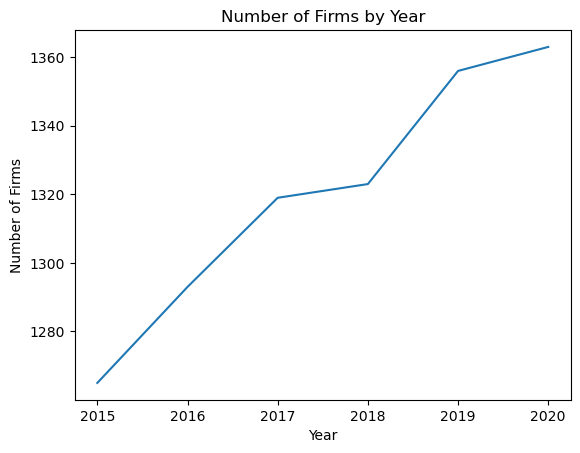

In [19]:
# ch04_25: 上場企業数の推移を折れ線グラフで可視化

plt.plot(
    N_firms_by_year['year'],
    N_firms_by_year['N_firms']
)
plt.xlabel('Year')
plt.ylabel('Number of Firms')
plt.title('Number of Firms by Year')
plt.show()

### 4.6 変数の作成とヒストグラムによる可視化

#### 4.6.1 新しい系列の追加

In [20]:
# ch04_26: 株主資本の計算 (1)

# 新しくBE列を定義
financial_data['BE'] = (
    (financial_data['OA'] - financial_data['OL']) -
    (financial_data['FO'] - financial_data['FA'])
)

**コードch04_27は，R言語特有のものであるため割愛**

#### 4.6.2 ラグの取り方

In [21]:
# ch04_28: shift()関数を用いて前期の株主資本を取得 (1)

financial_data['lagged_BE'] = financial_data['BE'].shift(1)
financial_data['lagged_BE'].head(6)  # head()関数で冒頭6行の結果のみ表示

## 1         NaN
## 2    10013.82
## 3    10426.33
## 4    10842.01
## 5    11074.95
## 6    11593.58
## Name: BE, dtype: float64

1         NaN
2    10013.82
3    10426.33
4    10842.01
5    11074.95
6    11593.58
Name: lagged_BE, dtype: float64

In [22]:
# ch04_29: shift()関数を用いて前期の株主資本を取得 (2)

financial_data['lagged_BE'] = financial_data.groupby('firm_ID')['BE'].shift(1)  # shift()関数をfirm_IDごとに適用
# カテゴリ型の変数でgroupby()関数を適用すると，現行のデフォルトでは観測されていないカテゴリも含めてグループ化するが，
# 将来的には観測されているカテゴリのみでグループ化するようデフォルトの変更が検討されているため，
# pandasのバージョンによってはFutureWarningが表示される

financial_data['lagged_BE'].head(6)  # head()関数で冒頭6行の結果のみ表示

1         NaN
2    10013.82
3    10426.33
4    10842.01
5    11074.95
6         NaN
Name: lagged_BE, dtype: float64

#### 4.6.3 ROEの計算とヒストグラムによる可視化

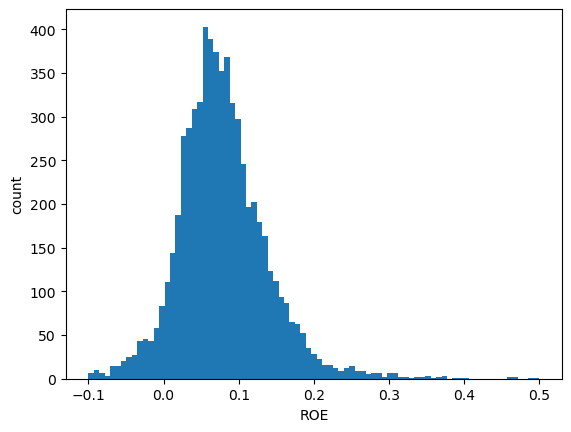

In [23]:
# ch04_30: ROEの計算とヒストグラムによる可視化

financial_data['ROE'] = financial_data['X'] / financial_data['lagged_BE']

plt.hist(financial_data['ROE'], range=(-0.1, 0.5), bins='auto')  # 表示するx軸の範囲を(-0.1, 0.5)に限定
plt.xlabel('ROE')
plt.ylabel('count')
plt.show()

### 4.7 グループごとの集計とランク付け

#### 4.7.1 産業ごとのROE平均値と棒グラフによる可視化

In [24]:
# ch04_31: 産業別のROE平均値を計算

mean_ROE_by_industry = financial_data.groupby('industry_ID')['ROE'].mean().reset_index()
# reset_index()メソッドを適用しなければindustry_IDがインデックスになってしまう

# columns属性に変数名を代入し，列名を指定
mean_ROE_by_industry.columns = ['industry_ID', 'mean_ROE']  
print(mean_ROE_by_industry)

##   industry_ID  mean_ROE
## 0           1  0.077311
## 1           2  0.107616
## 2           3  0.075489
## 3           4  0.073719
## 4           5  0.085703
## 5           6  0.095142
## 6           7  0.067555
## 7           8  0.093711
## 8           9  0.083403
## 9          10  0.075273

  industry_ID  mean_ROE
0           1  0.077311
1           2  0.107616
2           3  0.075489
3           4  0.073719
4           5  0.085703
5           6  0.095142
6           7  0.067555
7           8  0.093711
8           9  0.083403
9          10  0.075273


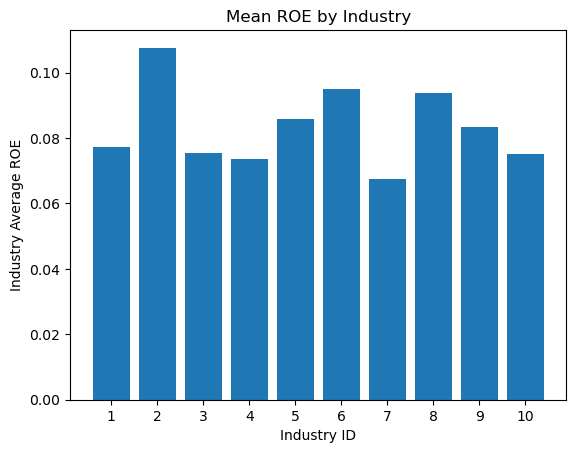

In [25]:
# ch04_32: 産業別のROE平均値を棒グラフで可視化

plt.bar(
    mean_ROE_by_industry['industry_ID'],
    mean_ROE_by_industry['mean_ROE']
)
plt.xticks(mean_ROE_by_industry['industry_ID'])  # x軸に全てのindustry_IDが表示されるようにする
plt.xlabel('Industry ID')
plt.ylabel('Industry Average ROE')
plt.title('Mean ROE by Industry')
plt.show()

#### 4.7.2 産業内でのROEのランク付け

In [26]:
# ch04_33: 最終年度のデータのみを抽出

# 最終年度のみを抽出し，financial_data_2020として定義
financial_data_2020 = financial_data[financial_data['year'] == 2020].copy()

In [27]:
# ch04_34: 最終年度に関してfirm_ID・industry_ID・ROEの各列を抽出

financial_data_2020 = financial_data[financial_data['year'] == 2020][['firm_ID', 'industry_ID', 'ROE']]

In [28]:
# ch04_35: 産業別に各企業をROEで順序付け (1)

financial_data_2020['ROE_rank'] = financial_data_2020.groupby('industry_ID')['ROE'].rank()  # rank()メソッドで順序付けが可能

In [29]:
# ch04_36: 産業別に各企業をROEで順序付け (2)

# 降順で順序付けするにはascending引数でFalseを指定
financial_data_2020['ROE_rank'] = financial_data_2020.groupby('industry_ID')['ROE'].rank(ascending=False)  

In [30]:
# ch04_37: 産業別に各企業をROEで順序付け (3)

financial_data_2020.sort_values(by=['industry_ID', 'ROE_rank'])

,firm_ID,industry_ID,ROE,ROE_rank
44,8,1,0.388255,1.0
451,90,1,0.333948,2.0
1142,225,1,0.300611,3.0
408,81,1,0.231127,4.0
870,171,1,0.218474,5.0
...,...,...,...,...
6438,1243,10,NaN,NaN
6616,1275,10,NaN,NaN
7103,1364,10,NaN,NaN
7568,1450,10,NaN,NaN


In [31]:
# ch04_38: 各産業でROEが最も高い企業のみを抽出 (1)

financial_data_2020[financial_data_2020['ROE_rank'] == 1]

,firm_ID,industry_ID,ROE,ROE_rank
44,8,1,0.388255,1.0
1241,242,2,0.374999,1.0
2485,475,3,0.497536,1.0
3261,619,4,0.149131,1.0
3482,661,5,0.267314,1.0
3749,719,6,0.142203,1.0
4822,929,7,0.564181,1.0
5433,1042,8,0.255996,1.0
6039,1167,9,0.234623,1.0
7179,1380,10,0.249793,1.0


**コードch04_39は，上記のコードch04_33-ch04_38までの流れとほとんど同じため割愛**


### 4.8 上級デュポン・モデルによるROEの分析とその可視化

#### 4.8.1 分析用のデータセットの作成

In [32]:
# ch04_40: 上級デュポン・モデルによるROEの分析

financial_data_DuPont = financial_data.copy()
financial_data_DuPont['NOA'] = financial_data_DuPont['OA'] - financial_data_DuPont['OL']
financial_data_DuPont['RNOA'] = financial_data_DuPont['OX'] / financial_data_DuPont.groupby('firm_ID')['NOA'].shift()
financial_data_DuPont['PM'] = financial_data_DuPont['OX'] / financial_data_DuPont['sales']
financial_data_DuPont['ATO'] = financial_data_DuPont['sales'] / financial_data_DuPont.groupby('firm_ID')['NOA'].shift()
financial_data_DuPont['NFO'] = financial_data_DuPont['FO'] - financial_data_DuPont['FA']
financial_data_DuPont['lagged_FLEV'] = financial_data_DuPont.groupby('firm_ID')['NFO'].shift() / financial_data_DuPont['lagged_BE']
financial_data_DuPont['NBC'] = financial_data_DuPont['NFE'] / financial_data_DuPont.groupby('firm_ID')['NFO'].shift()
financial_data_DuPont['ROE_DuPont'] = (
    financial_data_DuPont['RNOA'] +
    financial_data_DuPont['lagged_FLEV'] * 
    (financial_data_DuPont['RNOA'] - financial_data_DuPont['NBC'])
)

financial_data_DuPont.head()

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA,OL,...,lagged_BE,ROE,NOA,RNOA,PM,ATO,NFO,lagged_FLEV,NBC,ROE_DuPont
1,2016,1,1,5948.96,564.14,50.667498,513.48,13865.58,4642.16,4534.22,...,NaN,NaN,9331.36,NaN,0.094830,NaN,-682.46,NaN,NaN,NaN
2,2017,1,1,6505.06,691.18,29.543157,661.64,13952.58,7743.99,5111.22,...,10013.82,0.066073,8841.36,0.074071,0.106253,0.697118,-1584.97,-0.068152,-0.043289,0.066072
3,2018,1,1,6846.38,751.29,86.486500,664.80,18818.48,7284.72,5137.28,...,10426.33,0.063762,13681.20,0.084974,0.109735,0.774358,2839.19,-0.152016,-0.054567,0.063762
4,2019,1,1,7572.24,958.53,298.049774,660.48,18190.00,9735.13,5487.96,...,10842.01,0.060919,12702.04,0.070062,0.126585,0.553478,1627.09,0.261869,0.104977,0.060919
5,2020,1,1,7537.63,778.37,-65.458772,843.83,20462.86,10274.25,5371.38,...,11074.95,0.076193,15091.48,0.061279,0.103265,0.593419,3497.90,0.146916,-0.040231,0.076193


**コードch04_41は，R言語特有のものであるため割愛**

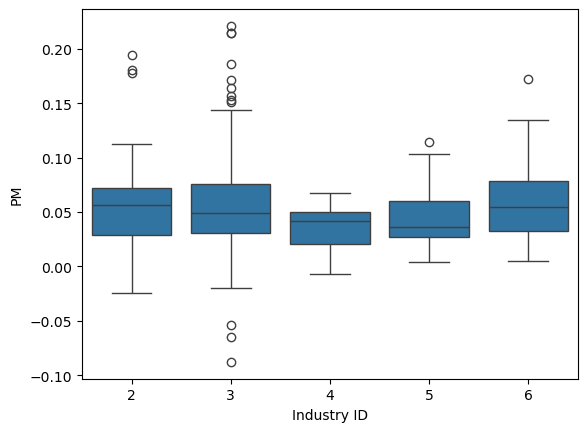

In [33]:
# ch04_42: 箱ひげ図を用いたPMの可視化

# seabornライブラリの読み込み
import seaborn as sns  

# 条件に合致する企業を抽出し，filtered_dataとして定義
filtered_data = financial_data_DuPont[
    (financial_data_DuPont['year'] == 2020) &
    (financial_data_DuPont['industry_ID'].isin(range(2, 7)))
].copy()

# 箱ひげ図により描画
sns.boxplot(
    x='industry_ID', 
    y='PM', 
    data=filtered_data, 
    order=sorted(filtered_data['industry_ID'].unique())
)
plt.xlabel('Industry ID')
plt.ylabel('PM')
plt.show()

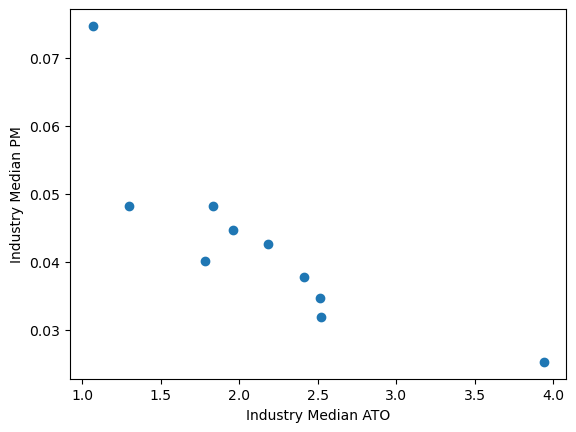

In [34]:
# ch04_43: ATOとPMのトレードオフの可視化

# 産業ごとにPMとATOの中央値を算出し，データフレームindustry_dataとして保存
industry_data = financial_data_DuPont.groupby('industry_ID')[['PM', 'ATO']].median().reset_index()
industry_data.columns = ['industry_ID', 'industry_median_PM', 'industry_median_ATO']

# x軸をATO，y軸をPMとする散布図を描画
plt.scatter(
    industry_data['industry_median_ATO'], 
    industry_data['industry_median_PM']
)
plt.xlabel('Industry Median ATO')
plt.ylabel('Industry Median PM')
plt.show()

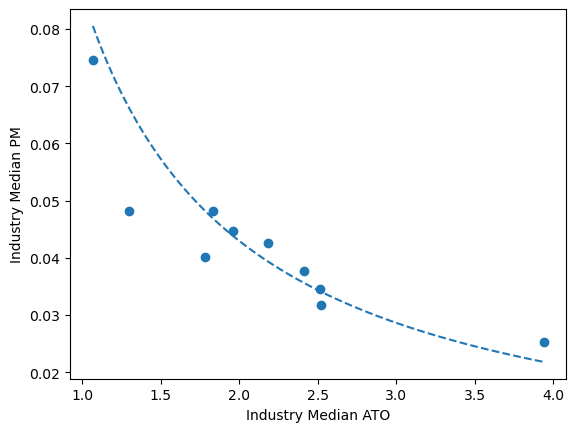

In [35]:
# ch04_44: ATOとPMが反比例するグラフを追加

# 産業ごとにPMとATOの中央値を算出し，データフレームindustry_dataとして保存
industry_data = financial_data_DuPont.groupby('industry_ID')[['PM', 'ATO']].median().reset_index()
industry_data.columns = ['industry_ID', 'industry_median_PM', 'industry_median_ATO']

# x軸をATO，y軸をPMとする散布図を描画
plt.scatter(
    industry_data['industry_median_ATO'], 
    industry_data['industry_median_PM']
)
plt.xlabel('Industry Median ATO')
plt.ylabel('Industry Median PM')

# 欠損値を除く全データに関してRNOAの中央値を計算
median_RNOA = np.median(financial_data_DuPont['RNOA'].dropna())

# ATOとPMが反比例するグラフを追加するため，industry_median_ATOの最小値から最大値まで100等分した等差数列を作成
x_values = np.linspace(
    industry_data['industry_median_ATO'].min(), 
    industry_data['industry_median_ATO'].max(), 
    100
)  
y_values = median_RNOA / x_values

# ATOとPMが反比例するグラフを追加
plt.plot(x_values, y_values, linestyle='dashed')

plt.show()

In [36]:
# ch04_45: データの保存

# pandasのto_csv()メソッドを使用してCSVに保存
financial_data.to_csv('ch04_output.csv', index=False)  

In [37]:
# 以上のコードについて，動作確認をした実行環境の表示
# 本セルは，実行環境の確認のためであり，無視してもらっても構わない
import session_info
session_info.show(dependencies=False)